# Projet D'analyse de données NFL Draft 
## MBOURANGA Winn-Elie (M1-WEB)

La NFL (National Football League) est soumise chaque année à un système proche du mercato dans d'autres sport qui s'appelle la Draft. Elle permet aux équipes de la ligue de pouvoir sélectionner les joueurs qu'elle désire signer. 

Dans la draft, il y a 16 à 17 tours (cela dépend des années...) pour 32 choix à chaque tour. Les joueurs professionnels en devenir (Prospect) sont donc choisit selon certains critères que les équipes recherchent.

A travers ce notebook, nous allons voir ensemble quelles caractéristiques influent sur la position des joueurs de la draft ? 


### 1) Importation du dataframe de l'analyse

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
#Import du fichier CSV
df=pd.read_csv('./nfl_draft_1970-2021.csv')

In [6]:
df

,year,round,pick,team,player,position,age,to,all_pro,pro_bowl,...,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles,college
0,1970,1,1,PIT,Terry Bradshaw,QB,22.0,1983.0,1,3,...,444.0,2257.0,32.0,0.0,1.0,0.0,NaN,NaN,NaN,Louisiana Tech
1,1970,1,2,GNB,Mike McCoy,DT,22.0,1980.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Notre Dame
2,1970,1,3,CLE,Mike Phipps,QB,22.0,1981.0,0,0,...,254.0,1278.0,13.0,0.0,0.0,0.0,NaN,NaN,NaN,Purdue
3,1970,1,4,BOS,Phil Olsen,DT,22.0,1976.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Utah St.
4,1970,1,5,BUF,Al Cowlings,DE,23.0,1979.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,USC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15768,2021,7,255,NOR,Kawaan Baker,WR,23.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Alabama
15769,2021,7,256,GNB,Kylin Hill,RB,23.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mississippi St.
15770,2021,7,257,DET,Jermar Jefferson,RB,21.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oregon St.
15771,2021,7,258,WAS,Dax Milne,WR,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BYU


In [8]:
print("Nous avons dans cet échantillon,",df.shape[0],"individus pour un total de",df.shape[1],"caractéristiques!")

Nous avons dans cet échantillon, 15773 individus pour un total de 29 caractéristiques!


In [9]:
df.fillna('Unknown')

,year,round,pick,team,player,position,age,to,all_pro,pro_bowl,...,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles,college
0,1970,1,1,PIT,Terry Bradshaw,QB,22.0,1983.0,1,3,...,444.0,2257.0,32.0,0.0,1.0,0.0,Unknown,Unknown,Unknown,Louisiana Tech
1,1970,1,2,GNB,Mike McCoy,DT,22.0,1980.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Unknown,Unknown,Notre Dame
2,1970,1,3,CLE,Mike Phipps,QB,22.0,1981.0,0,0,...,254.0,1278.0,13.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Purdue
3,1970,1,4,BOS,Phil Olsen,DT,22.0,1976.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Utah St.
4,1970,1,5,BUF,Al Cowlings,DE,23.0,1979.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,USC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15768,2021,7,255,NOR,Kawaan Baker,WR,23.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,South Alabama
15769,2021,7,256,GNB,Kylin Hill,RB,23.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Mississippi St.
15770,2021,7,257,DET,Jermar Jefferson,RB,21.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Oregon St.
15771,2021,7,258,WAS,Dax Milne,WR,Unknown,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,BYU


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15773 entries, 0 to 15772
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           15773 non-null  int64  
 1   round          15773 non-null  int64  
 2   pick           15773 non-null  int64  
 3   team           15773 non-null  object 
 4   player         15773 non-null  object 
 5   position       15773 non-null  object 
 6   age            11967 non-null  float64
 7   to             11592 non-null  float64
 8   all_pro        15773 non-null  int64  
 9   pro_bowl       15773 non-null  int64  
 10  starter        15773 non-null  int64  
 11  carAV          11592 non-null  float64
 12  drAV           10168 non-null  float64
 13  games          11563 non-null  float64
 14  pass_comp      11592 non-null  float64
 15  pass_att       11592 non-null  float64
 16  pass_yards     11592 non-null  float64
 17  pass_tds       11592 non-null  float64
 18  pass_i

On a beaucoup de variables quantitatives mais on va surtout s'intérésser à celles qui visent les performances des joueurs.


In [34]:
dft=df[(df['round']==1) | (df['round']==2)]
dft.shape

(3088, 29)

### 2) Quels sont tout d'abord les postes les plus prisés ?

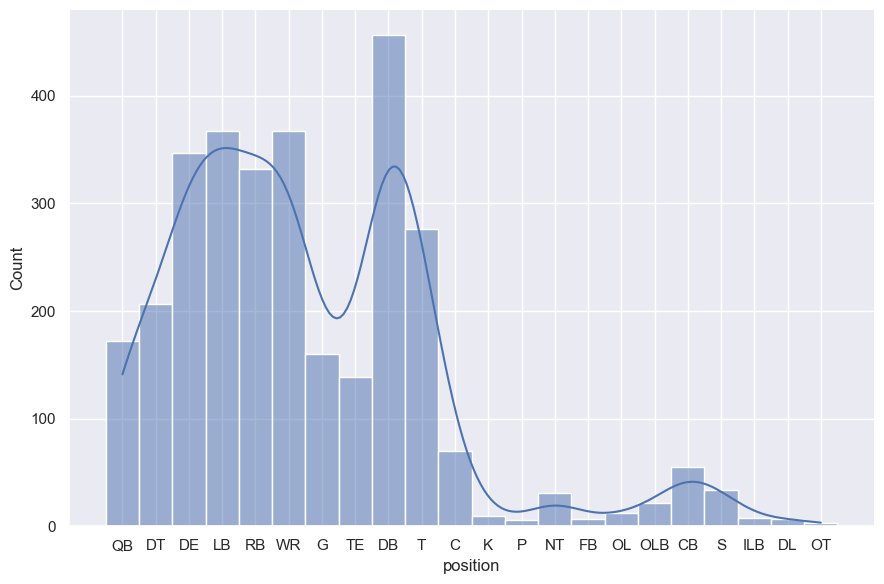

In [43]:
#distribution des postes dans le round 1 sur toutes les années
sb.set_theme()
sb.displot(x="position",  data=dft, kde=True, height=6, aspect=1.5)

On peut en déduire que les postes les plus prisé sont :
- Les DefensiveEnd (DE)
- Les Wides receivers (WR)
- Les RunningBacks (RB)
- les Defensivesbacks (DB)

Donc le poste pourrait influer le choix car on peut voir d'après ce graphique que certains postes sont plus présent que d'autres dans les 1ers rounds de chaque année

Les variables auxquelles nous allons nous intérésser sont:

- position (variable catégorique)
- age (variable catégorique)
- pass_yards (variable quantitative)
- pass_tds (variable quantitative)
- rush_yards (variable quantitative)
- rush_tds (variable quantitative)
- receptions (variable quantitative)

round sera notre variable cible pour cette analyse.

## 3) Performances statistiques des joueurs

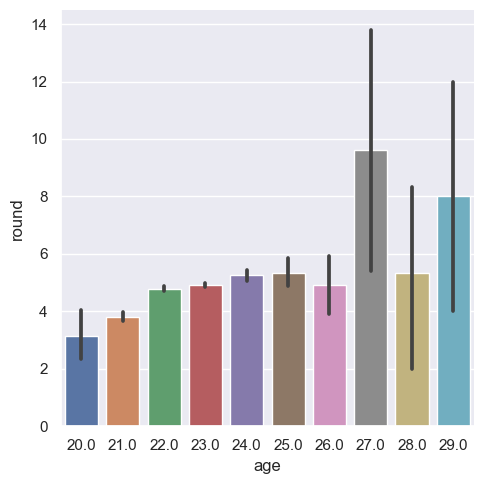

In [16]:
#Age des joueurs en fonction de leur round de sélection
sb.set_theme()
sb.catplot(x="age", y="round", data=df, kind='bar')

In [17]:
df.age.describe()

count    11967.000000
mean        22.456673
std          0.853427
min         20.000000
25%         22.000000
50%         22.000000
75%         23.000000
max         29.000000
Name: age, dtype: float64

Age moyen du 1er round :
22 ans, ce qui semble être très significatif des joueurs sélectionnées au premier tour car la variance est inférieure à 10% du max. Donc l'age peut être une caractéristique influente.

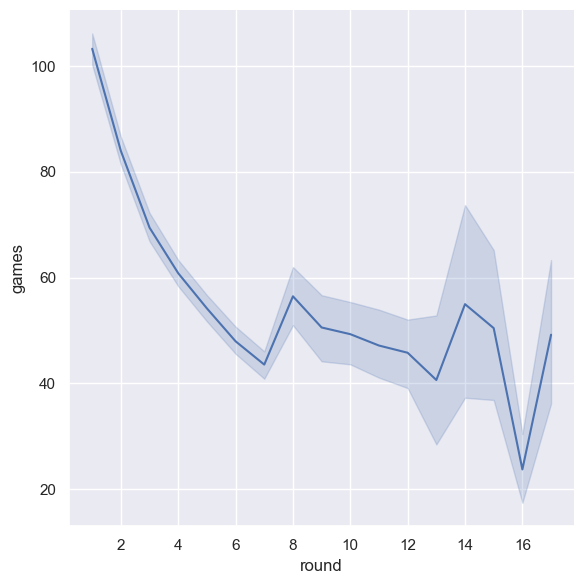

In [18]:
#nombre de parties jouées en fonction du tour de la draft
sb.set_theme()
sb.relplot(data=df, x="round", y="games", kind='line', height=6,aspect=1)

Ici plus la position du joueur augmente lors du 1er tour, plus sont nombre de matchs diminue.
Le nombre de match influence donc sur la position du joueur car cette variable a un effet décroissant sur la courbe représentée ci-dessus.

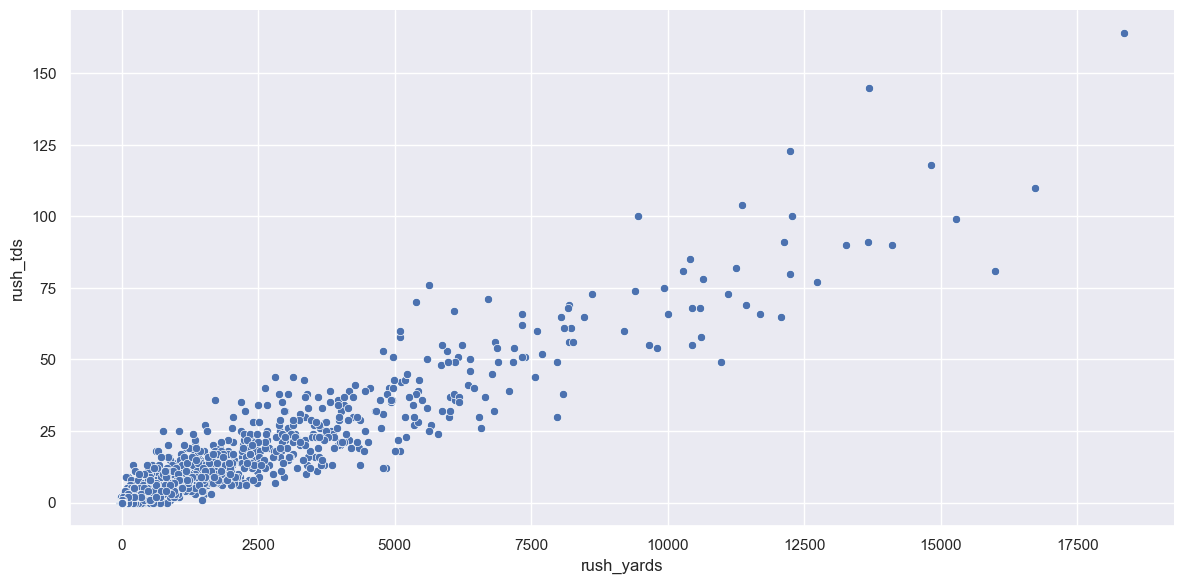

In [53]:
#nombre de rush ayant générer un touchdown par rapport aux distances parcourues lors de ceux ci
sb.relplot(data=df, x="rush_yards", y="rush_tds",  height=6, aspect=2)

Le nombre de touchdown grâce aux rush augmente avec la distance de ceux ci ==> relation positive entre ces 2 variables

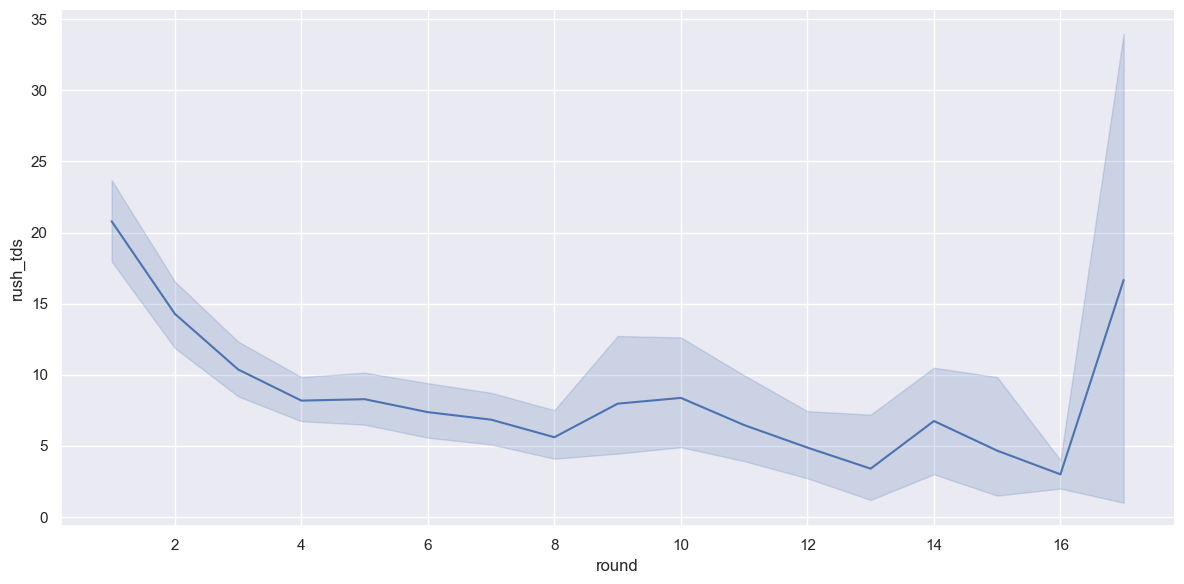

In [46]:
#nombre de rush ayant générer un touchdown par rapport aux rounds de selection
sb.relplot(data=df[df['rush_tds']!=0], x="round", y="rush_tds", kind='line', height=6, aspect=2)

Tendance décroissante pour ce graphique ==> les joueurs tirés au premier round sont ceux qui génèrent le plus de touchdown et donc le plus de points.

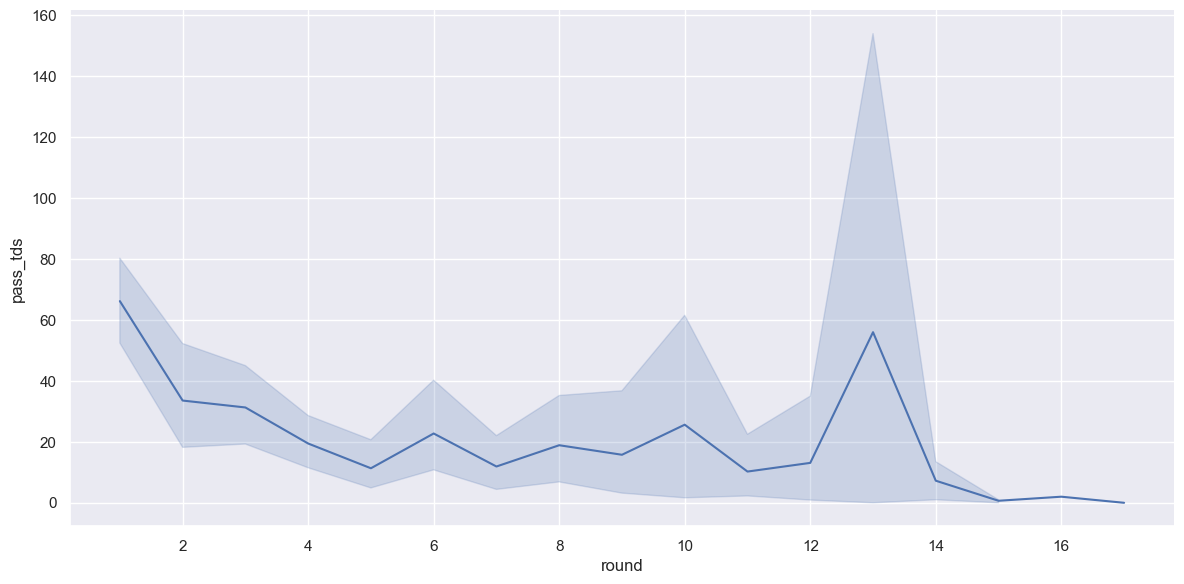

In [52]:
#distances parcourues par les passes par rapport aux rounds de selection
sb.set_theme()
sb.relplot(data=df[df['pass_yards']!=0], x="round", y="pass_tds", kind='line', height=6, aspect=2)

De même, observation d'une tendance décroissante pour le nombre de passes générant des touchdowns sur le numéro de tour de la draft ==> plus le tour de draft est élevé, moins les joueurs génèrent des touchdowns et donc moins il font gagner de points à leur équipe.

## 4) Corrélation positive ou négative ?

Ici on va déterminer si la corrélation entre le round et les autres variables significatives à une tendance plutôt positive ou bien négative.

In [47]:
df_corr= pd.DataFrame({
    'round': df['round'],
    'age':df['age'],
    'games':df['games'],
    'rush_yds':df['rush_yards'],
    'pass_yds':df['pass_yards'],
    'rush_tds':df['rush_tds'],
    'pass_tds':df['pass_tds'],
    'receptions':df['receptions'],
})

df_corr.fillna('unknown')

,round,age,games,rush_yds,pass_yds,rush_tds,pass_tds,receptions
0,1,22.0,168.0,2257.0,27989.0,32.0,212.0,0.0
1,1,22.0,132.0,0.0,0.0,0.0,0.0,0.0
2,1,22.0,119.0,1278.0,10506.0,13.0,55.0,0.0
3,1,22.0,79.0,0.0,0.0,0.0,0.0,0.0
4,1,23.0,101.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
15768,7,23.0,unknown,unknown,unknown,unknown,unknown,unknown
15769,7,23.0,unknown,unknown,unknown,unknown,unknown,unknown
15770,7,21.0,unknown,unknown,unknown,unknown,unknown,unknown
15771,7,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [48]:
corr=df_corr.corr()
corr

,round,age,games,rush_yds,pass_yds,rush_tds,pass_tds,receptions
round,1.000000,0.105638,-0.285872,-0.118110,-0.073334,-0.115207,-0.070815,-0.146493
age,0.105638,1.000000,-0.128802,-0.077980,-0.010210,-0.073413,-0.013347,-0.092179
games,-0.285872,-0.128802,1.000000,0.164608,0.155164,0.165571,0.157398,0.316695
rush_yds,-0.118110,-0.077980,0.164608,1.000000,0.109710,0.958654,0.110682,0.334561
pass_yds,-0.073334,-0.010210,0.155164,0.109710,1.000000,0.167953,0.992648,-0.032268
rush_tds,-0.115207,-0.073413,0.165571,0.958654,0.167953,1.000000,0.168921,0.306457
pass_tds,-0.070815,-0.013347,0.157398,0.110682,0.992648,0.168921,1.000000,-0.028120
receptions,-0.146493,-0.092179,0.316695,0.334561,-0.032268,0.306457,-0.028120,1.000000


<AxesSubplot: >

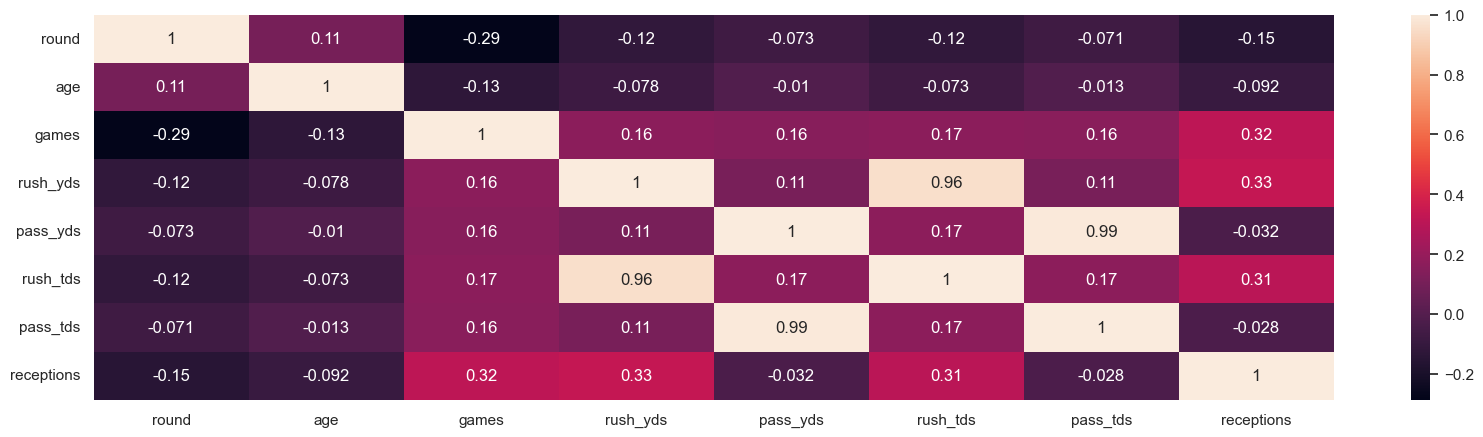

In [49]:
f, ax = plt.subplots(figsize=(20,5))
sb.heatmap(corr, annot=True, ax =ax)

## ==> Corrélation plutôt **négative** d'après ce heatmap.

## 5) Conclusion

Pour conclure, on peut dire que ces caractéristiques sont influentes dans le choix de la draft car en globalité, nous avons vu que plus nous allions dans les derniers rounds, moins les performances étaient correctes. 